In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [4]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
X = diabetes.data
y = diabetes.target
y = y.reshape(-1, 1)
np.shape(X)
np.shape(y)

(442, 10)

(442, 1)

In [6]:
# Univariate linear regression model (only based on bmi)
bmi = X[:,2]
bmi = bmi.reshape(-1, 1)
np.shape(bmi)

(442, 1)

In [7]:
# building the model

from sklearn.linear_model import LinearRegression

bmi_lr = LinearRegression()
bmi_lr.fit(bmi, y)
y_pred = bmi_lr.predict(bmi)

LinearRegression()

Text(0, 0.5, 'Diabetes measure')

Text(0.5, 0, 'bmi')

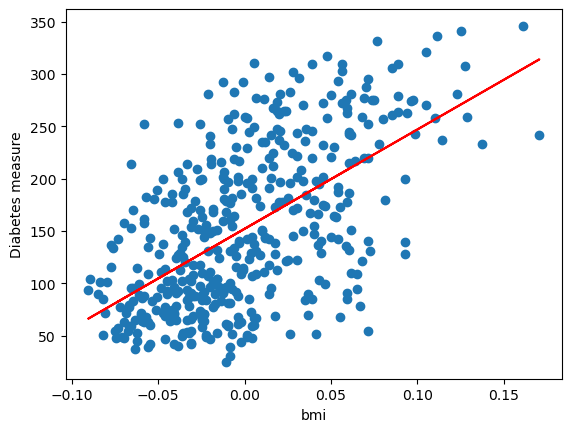

In [8]:
plt.scatter(bmi, y)
plt.plot(bmi, y_pred, c="red")
plt.ylabel("Diabetes measure")
plt.xlabel("bmi")


In [21]:
# Evaluating the performance of the univariate model using R^2 Score (cof) and K-fold cross validation

from sklearn.model_selection import cross_val_score

cof = cross_val_score(bmi_lr, bmi, y, scoring = "r2", cv=10)
print (f"The R2 scores for 10 cross validations are:\n {cof}")
print (f" The mean of the R2 scores for 10 cross validations is: {cof.mean()}")

The R2 scores for 10 cross validations are:
 [0.31895643 0.00210559 0.22467725 0.46430326 0.19557393 0.50309996
 0.28038004 0.29884357 0.3088813  0.42764352]
 The mean of the R2 scores for 10 cross validations is: 0.302446485542614


In [22]:
# Multiple linear regression (Using all 10 features)

multiple_lr = LinearRegression()
multiple_lr.fit(X,y)
cof_m = cross_val_score(multiple_lr, X, y, scoring = "r2", cv=10)
print (f"The R2 scores for 10 cross validations are:\n {cof_m}")
print (f" The mean of the R2 scores for 10 cross validations is: {cof_m.mean()}")

LinearRegression()

The R2 scores for 10 cross validations are:
 [0.55614411 0.23056092 0.35357777 0.62190498 0.26587602 0.61819338
 0.41815916 0.43515232 0.43436983 0.68568514]
 The mean of the R2 scores for 10 cross validations is: 0.4619623619583371


In [23]:
# Coefficients of the multiple linear regression model

multiple_lr_coeffs = multiple_lr.coef_
feature_names = diabetes.feature_names
print (f"The coefficients of the linear regression model with features {feature_names} are:\n {multiple_lr_coeffs}")


The coefficients of the linear regression model with features ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] are:
 [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]


([<matplotlib.axis.XTick at 0x7f8f25669610>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'bmi'),
  Text(3, 0, 'bp'),
  Text(4, 0, 's1'),
  Text(5, 0, 's2'),
  Text(6, 0, 's3'),
  Text(7, 0, 's4'),
  Text(8, 0, 's5'),
  Text(9, 0, 's6')])

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Model coefficients')

Text(0.5, 1.0, 'Model coefficients for multiple linear regression model using all 10 features')

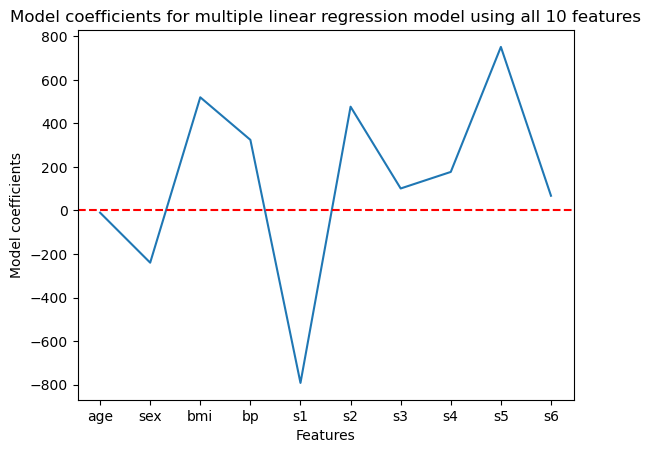

In [12]:
num_features = len(feature_names)

plt.plot(range(num_features), multiple_lr_coeffs.T)
plt.xticks(range(num_features),feature_names)
plt.axhline(0, color='r', linestyle="dashed")
plt.xlabel("Features")
plt.ylabel("Model coefficients")
plt.title("Model coefficients for multiple linear regression model using all 10 features")

In [14]:
# Implementing Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

ridge= GridSearchCV(Ridge(), alpha, scoring='r2', cv=10 )
print("The best value of alpha is:",ridge.fit(X,y).best_params_)
print("The best score for the best Ridge estimator is:",ridge.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.06}
The best score for the best Ridge estimator is: 0.4635352456321318


Ridge(alpha=0.06)

([<matplotlib.axis.XTick at 0x7f8f2455f430>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'bmi'),
  Text(3, 0, 'bp'),
  Text(4, 0, 's1'),
  Text(5, 0, 's2'),
  Text(6, 0, 's3'),
  Text(7, 0, 's4'),
  Text(8, 0, 's5'),
  Text(9, 0, 's6')])

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Model coefficients')

Text(0.5, 1.0, 'Model coefficients for best Ridge model using all 10 features')

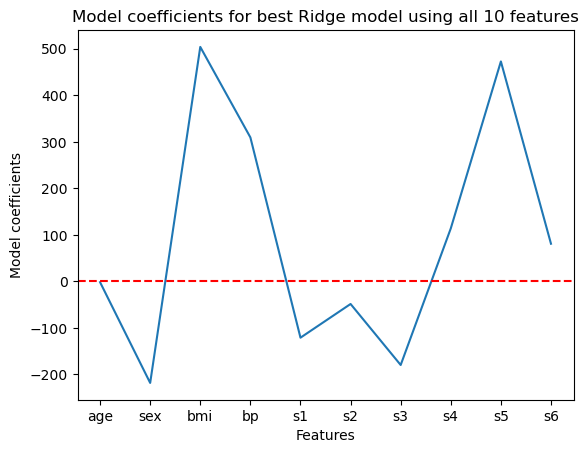

In [15]:
# Plotting the coefficients of the best Ridge model
best_ridge = Ridge(alpha= 0.06)
best_ridge.fit(X,y)
best_ridge_coeff = best_ridge.coef_
num_features = len(feature_names)

plt.plot(range(num_features), best_ridge_coeff.T)
plt.xticks(range(num_features),feature_names)
plt.axhline(0, color='r', linestyle="dashed")
plt.xlabel("Features")
plt.ylabel("Model coefficients")
plt.title("Model coefficients for best Ridge model using all 10 features")

In [16]:
# Implementing Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

lasso= GridSearchCV(Lasso(), alpha, scoring='r2', cv=10 )
print("The best value of alpha  for Lasso is:",lasso.fit(X,y).best_params_)
print("The best score for the best Lasso estimator is:",lasso.fit(X,y).best_score_)

The best value of alpha  for Lasso is: {'alpha': 0.06}
The best score for the best Lasso estimator is: 0.46522590380515216


Lasso(alpha=0.06)

([<matplotlib.axis.XTick at 0x7f8f244f9730>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'bmi'),
  Text(3, 0, 'bp'),
  Text(4, 0, 's1'),
  Text(5, 0, 's2'),
  Text(6, 0, 's3'),
  Text(7, 0, 's4'),
  Text(8, 0, 's5'),
  Text(9, 0, 's6')])

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Model coefficients')

Text(0.5, 1.0, 'Model coefficients for best Lasso model using all 10 features')

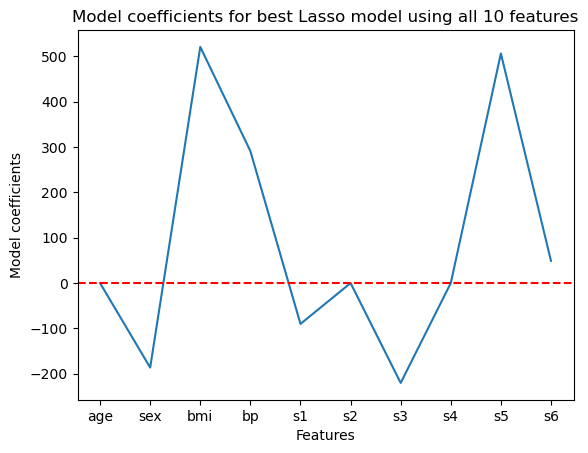

In [17]:
# Plotting the coefficients of the best Ridge model
best_lasso = Lasso(alpha= 0.06)
best_lasso.fit(X,y)
best_lasso_coeff = best_lasso.coef_
num_features = len(feature_names)

plt.plot(range(num_features), best_lasso_coeff.T)
plt.xticks(range(num_features),feature_names)
plt.axhline(0, color='r', linestyle="dashed")
plt.xlabel("Features")
plt.ylabel("Model coefficients")
plt.title("Model coefficients for best Lasso model using all 10 features")

In [18]:
# Implementation of Net Elastic Regression

from sklearn.linear_model import ElasticNet
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic= GridSearchCV(ElasticNet(), alpha_values, scoring='r2', cv=10 )
print("The best parameters  for Net Elastic Regression are:" , elastic.fit(X,y).best_params_)
print("The score for the best Net Elastic Regression estimator is:", elastic.fit(X,y).best_score_)


The best parameters  for Net Elastic Regression are: {'alpha': 0.06, 'l1_ratio': 1}
The score for the best Net Elastic Regression estimator is: 0.46522590380515216
